In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('cleaned_data_7-30.csv')

pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [3]:
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,sql_yn,python_yn,excel_yn,ML_yn,tableau_yn,tensorflow_yn,aws_yn,spark_yn,nlp_yn
0,Data Scientist (and Algorithm Developer),$80K-$128K\n(Glassdoor est.),JOB DESCRIPTION\nThe Data Scientist & Algorith...,3.5,Bridgestone Americas\n3.5,"Nashville, TN","Nashville, TN",10000+ employees,1900,Subsidiary or Business Segment,...,120,0,1,0,0,1,0,0,0,0
1,Data Scientist,$77K-$92K\n(Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,3.0,Affinity Solutions\n3.0,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,1,1,1,0,0,0,0,0
2,"Director, Data Solutions Architect",$159K-$262K\n(Glassdoor est.),"The Director, Data Solutions Architect will\nl...",3.9,NFL\n3.9,"New York, NY","New York, NY",1001 to 5000 employees,1920,Company - Private,...,100,1,1,0,1,0,1,1,0,0
3,Data Engineer,$72K-$135K\n(Glassdoor est.),ARC is searching for a Data Engineer to join o...,3.9,Airlines Reporting Corporation\n3.9,"Arlington, VA","Arlington, VA",201 to 500 employees,1984,Company - Private,...,36,1,1,0,0,1,0,1,0,0
4,Senior Data Scientist,$86K-$137K\n(Glassdoor est.),GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,...,84,1,1,1,1,0,0,1,1,0


In [4]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer provided', 'hourly', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'job_town', 'age',
       'sql_yn', 'python_yn', 'excel_yn', 'ML_yn', 'tableau_yn',
       'tensorflow_yn', 'aws_yn', 'spark_yn', 'nlp_yn'],
      dtype='object')

In [5]:
def title_cleaner(title):
    # code goes here
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    

def seniority_cleaner(title):
    # code goes here
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'
    

In [6]:
df['job_simple'] = df['Job Title'].apply(title_cleaner)


In [7]:
df.job_simple.value_counts()


data scientist      532
na                   61
data engineer        44
analyst              41
machine learning     37
manager              10
director              2
Name: job_simple, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority_cleaner)
df.seniority.value_counts()


na        629
senior     98
Name: seniority, dtype: int64

In [9]:
# job description length
df['desc_length'] = df['Job Description'].apply(lambda x: int(len(x)))
df.desc_length.value_counts()


2668    7
7646    5
2270    5
4151    5
4428    4
2762    4
2636    4
4195    4
3841    4
3020    4
5702    4
6297    4
4354    4
3619    4
4692    4
4508    4
2711    4
1052    4
4760    4
1841    4
4038    3
3070    3
2060    3
3453    3
4727    3
5543    3
3412    3
2947    3
4394    3
3489    3
4604    3
4521    3
3533    3
6617    3
3871    3
2836    3
3854    3
2615    3
2624    3
3659    3
3662    3
2799    3
639     3
2692    3
1712    3
6751    3
2257    3
3774    3
3046    3
4203    3
3025    3
5274    3
5282    3
1116    3
3027    3
5090    3
4287    3
4070    3
3189    3
3314    3
3736    3
3929    3
4115    3
3048    2
3169    2
3638    2
4834    2
3172    2
4651    2
2600    2
3081    2
4747    2
804     2
4778    2
2562    2
3337    2
468     2
2273    2
4579    2
1568    2
5210    2
679     2
4166    2
2098    2
4739    2
1658    2
2679    2
3105    2
3685    2
2655    2
4761    2
5768    2
3741    2
3546    2
2637    2
3660    2
2129    2
3658    2
3860    2
2121    2


In [10]:
# Competitor count
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.num_competitors.value_counts()


0    491
3    185
2     37
1     10
4      3
5      1
Name: num_competitors, dtype: int64

In [11]:
# recalculate hourly into min/max salary
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)


In [12]:
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]


,hourly,min_salary,max_salary
391,1,26,48
539,1,26,48
658,1,26,48


In [15]:
df.describe()


,Rating,Founded,employer provided,hourly,min_salary,max_salary,average_salary,age,sql_yn,python_yn,excel_yn,ML_yn,tableau_yn,tensorflow_yn,aws_yn,spark_yn,nlp_yn,desc_length,num_competitors
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.00000,727.000000
mean,3.684044,1742.573590,0.004127,0.004127,80.928473,127.335626,104.055708,32.672627,0.579092,0.735901,0.464924,0.643741,0.199450,0.121045,0.251719,0.259972,0.086657,3617.98762,0.902338
std,0.891539,648.518528,0.064150,0.064150,26.041667,33.657244,29.125938,38.666514,0.494045,0.441156,0.499112,0.479223,0.399862,0.326405,0.434300,0.438921,0.281526,1488.08118,1.340237
min,-1.000000,-1.000000,0.000000,0.000000,12.000000,48.000000,18.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.00000,0.000000
25%,3.300000,1944.000000,0.000000,0.000000,66.000000,106.000000,85.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2668.00000,0.000000
50%,3.700000,1994.000000,0.000000,0.000000,79.000000,124.000000,101.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3532.00000,0.000000
75%,4.200000,2009.000000,0.000000,0.000000,95.000000,144.000000,119.000000,46.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4459.00000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,212.000000,331.000000,271.500000,338.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9683.00000,5.000000


In [16]:
df[['age','average_salary','Rating','num_competitors','python_yn','excel_yn','tableau_yn']].corr()


,age,average_salary,Rating,num_competitors,python_yn,excel_yn,tableau_yn
age,1.000000,-0.033549,0.034798,0.312356,-0.019449,-0.001595,0.002714
average_salary,-0.033549,1.000000,0.082169,0.049469,0.222513,-0.013202,0.001233
Rating,0.034798,0.082169,1.000000,0.098870,0.009934,0.047030,-0.067564
num_competitors,0.312356,0.049469,0.098870,1.000000,0.047173,-0.059695,0.020975
python_yn,-0.019449,0.222513,0.009934,0.047173,1.000000,0.020428,0.174083
excel_yn,-0.001595,-0.013202,0.047030,-0.059695,0.020428,1.000000,0.190390
tableau_yn,0.002714,0.001233,-0.067564,0.020975,0.174083,0.190390,1.000000


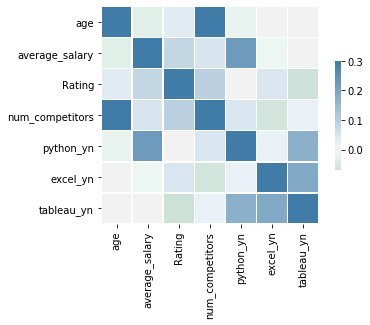

In [17]:
# correlation heatmap
cmap = sns.diverging_palette(150,240, as_cmap = True)
sns.heatmap(df[['age','average_salary','Rating','num_competitors','python_yn','excel_yn','tableau_yn']].corr(), vmax = 0.3, 
            center = 0, cmap = cmap, square = True, linewidths = 0.5, cbar_kws = {'shrink': 0.5})


In [18]:
# categorical variables
df_cat = df[[ 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 
              'Revenue','employer provided', 'hourly', 'company_text', 'job_state', 'job_town','age',
              'sql_yn', 'python_yn', 'excel_yn', 'ML_yn', 'tableau_yn','tensorflow_yn', 'aws_yn',
              'spark_yn', 'nlp_yn']]


Graph for Location, Total = 198


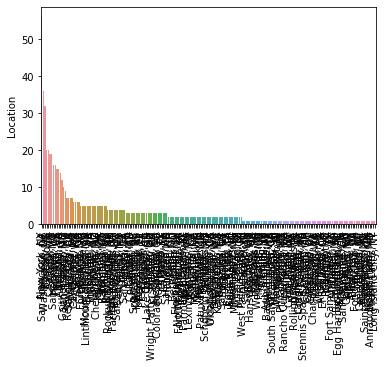

Graph for Headquarters, Total = 215


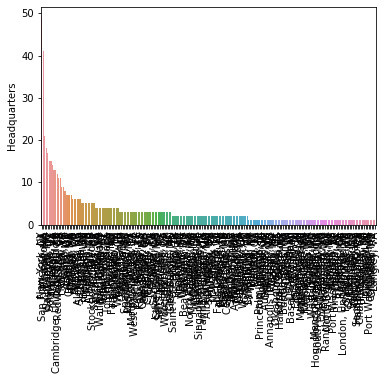

Graph for Size, Total = 8


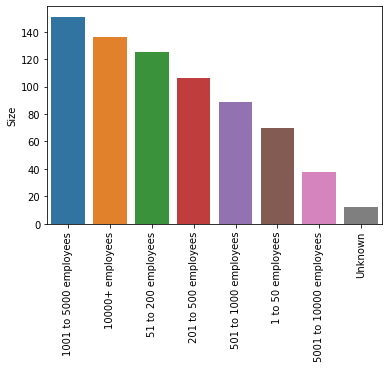

Graph for Type of ownership, Total = 12


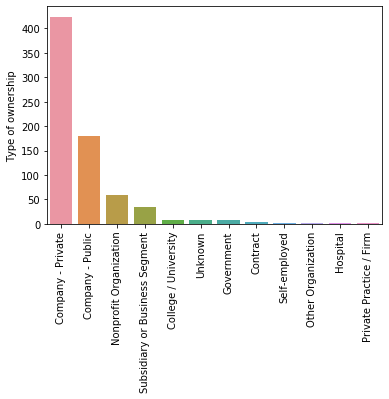

Graph for Industry, Total = 72


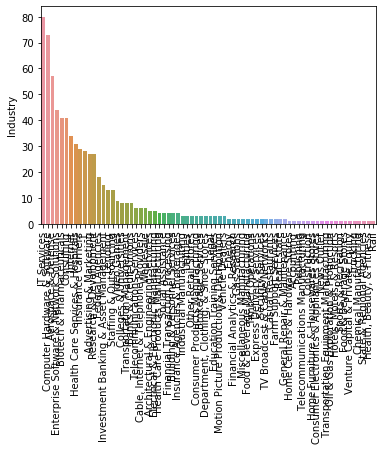

Graph for Sector, Total = 25


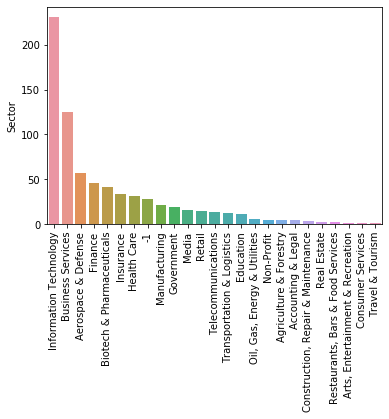

Graph for Revenue, Total = 13


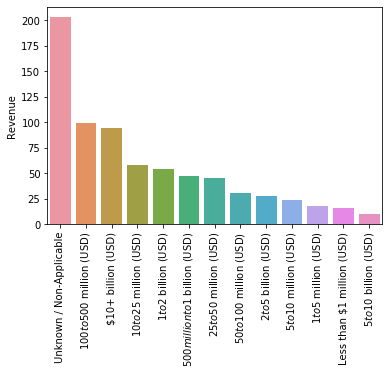

Graph for employer provided, Total = 2


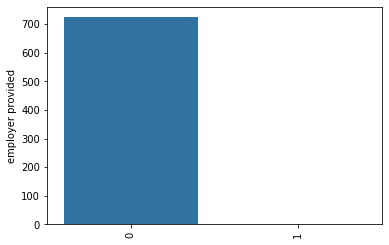

Graph for hourly, Total = 2


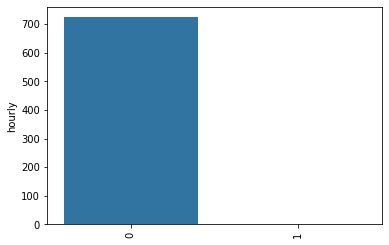

Graph for company_text, Total = 423


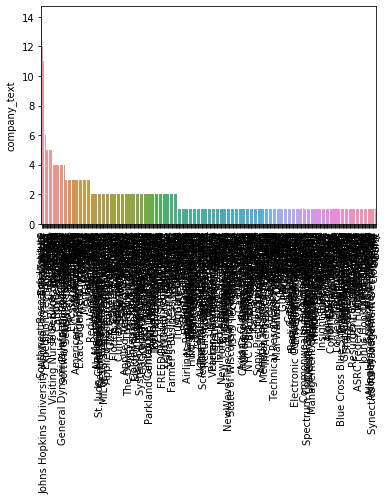

Graph for job_state, Total = 38


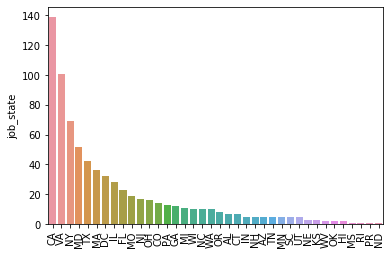

Graph for job_town, Total = 195


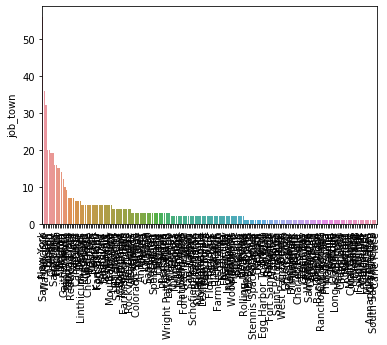

Graph for age, Total = 110


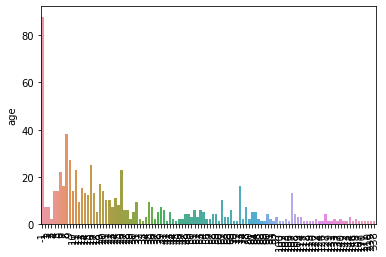

Graph for sql_yn, Total = 2


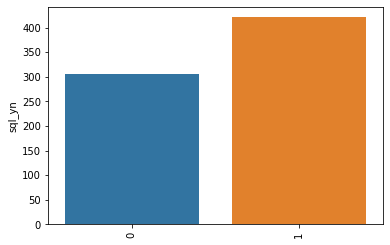

Graph for python_yn, Total = 2


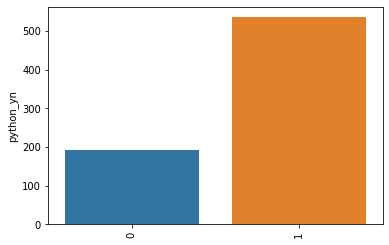

Graph for excel_yn, Total = 2


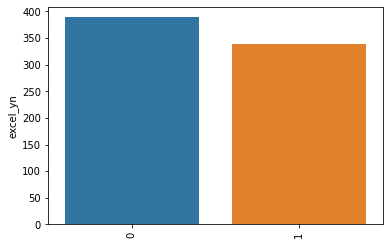

Graph for ML_yn, Total = 2


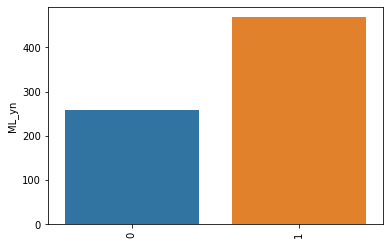

Graph for tableau_yn, Total = 2


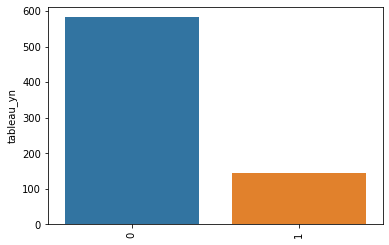

Graph for tensorflow_yn, Total = 2


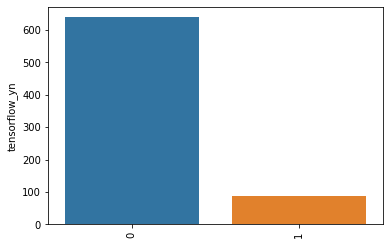

Graph for aws_yn, Total = 2


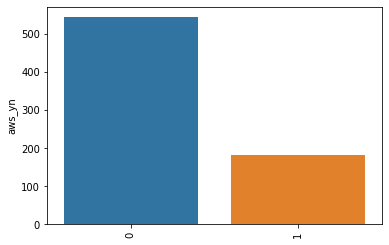

Graph for spark_yn, Total = 2


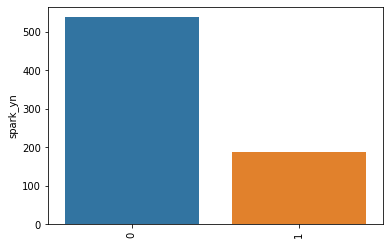

Graph for nlp_yn, Total = 2


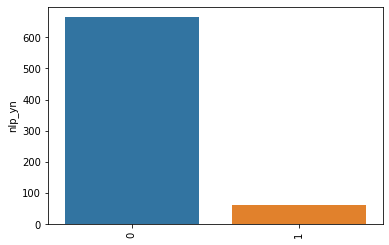

In [19]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s, Total = %d" %(i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()
    

Graph for company_text, Total = 20


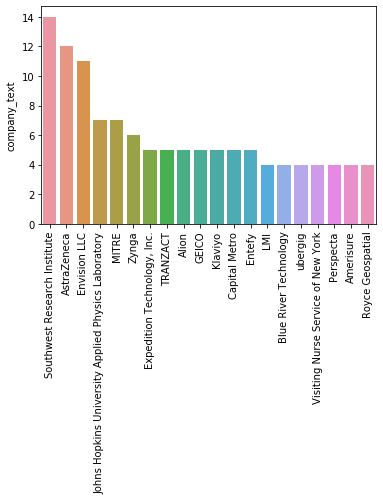

Graph for Location, Total = 20


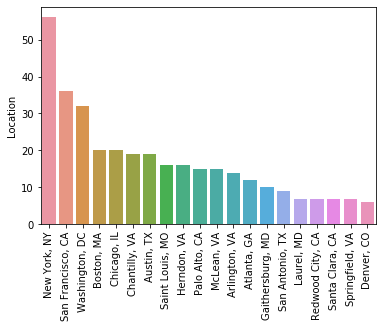

Graph for Headquarters, Total = 20


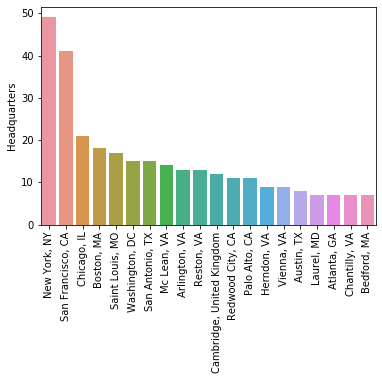

Graph for Industry, Total = 20


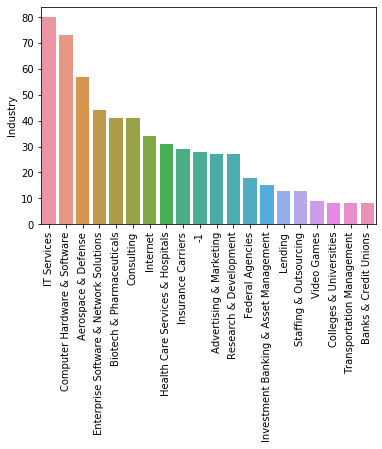

In [20]:
# top twenty in larger categories that had illegible axes due to high number of categories

for i in df_cat[['company_text','Location', 'Headquarters', 'Industry']]:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s, Total = %d" %(i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()
    

In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer provided', 'hourly', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'job_town', 'age',
       'sql_yn', 'python_yn', 'excel_yn', 'ML_yn', 'tableau_yn',
       'tensorflow_yn', 'aws_yn', 'spark_yn', 'nlp_yn', 'job_simple',
       'seniority', 'desc_length', 'num_competitors'],
      dtype='object')

In [22]:
# pivot table partitioning the data by main job type, displaying average salary
pd.pivot_table(df, index = 'job_simple', values = 'average_salary')


,average_salary
job_simple,
analyst,75.402439
data engineer,94.011364
data scientist,108.167293
director,195.000000
machine learning,129.756757
manager,64.550000
na,82.606557


In [23]:
# pivot table partitioning the data by main job type and seniority, displaying average salary
pd.pivot_table(df, index = ['job_simple', 'seniority'], values = 'average_salary')


average_salary
job_simple       seniority                
analyst          na              67.600000
                 senior          96.681818
data engineer    na              91.697368
                 senior         108.666667
data scientist   na             103.476744
                 senior         145.771186
director         na             195.000000
machine learning na             128.411765
                 senior         145.000000
manager          na              63.222222
                 senior          76.500000
na               na              75.767442
                 senior          98.944444

In [28]:
# pivot table partitioning the data by job state, displaying average salary sorted into descending order
pd.pivot_table(df, index = 'job_state', values = 'average_salary').sort_values('average_salary', ascending = False)


,average_salary
job_state,
CA,129.564748
NJ,118.470588
NY,109.449275
MA,108.250000
PA,107.615385
WA,105.650000
GA,105.125000
NH,102.600000
VA,101.485149


In [30]:
# pivot table partitioning the data by job state and main job type, displaying average salary sorted into descending order
pd.pivot_table(df, index = ['job_state', 'job_simple'], values = 'average_salary').sort_values('average_salary', ascending = False)[:20]


,,average_salary
job_state,job_simple,
NY,director,210.500000
IL,director,179.500000
CA,machine learning,153.117647
NY,manager,142.500000
CA,analyst,140.875000
NY,machine learning,128.250000
CA,data scientist,128.107143
NJ,data scientist,121.666667
CA,data engineer,121.277778


In [39]:
# looping through attributes to see if there are any interesting pivot tables
df_pivots = df[['Rating','Industry','Sector', 'Revenue', 'num_competitors','employer provided',
                'sql_yn', 'python_yn', 'excel_yn', 'ML_yn', 'tableau_yn','tensorflow_yn',
                'aws_yn', 'spark_yn', 'nlp_yn', 'job_simple','seniority', 'desc_length', 'average_salary']]


,average_salary
Sector,
-1,103.392857
Accounting & Legal,90.500000
Aerospace & Defense,97.710526
Agriculture & Forestry,106.000000
"Arts, Entertainment & Recreation",210.500000
Biotech & Pharmaceuticals,110.609756
Business Services,96.868000
"Construction, Repair & Maintenance",62.000000
Consumer Services,72.500000


In [49]:
for i in df_pivots.columns:
    print(i)
    if (i != 'average_salary'):
        print(pd.pivot_table(df_pivots, index = i, values = 'average_salary').sort_values('average_salary', ascending = False))
        print()

Rating
        average_salary
Rating                
 2.1        151.500000
 1.9        129.500000
 4.7        125.000000
 4.5        122.197674
 3.9        117.782051
 4.2        117.708333
 3.6        117.487500
 4.3        112.107143
 2.7        111.708333
 3.7        111.420000
 2.4        109.500000
 4.9        108.285714
-1.0        107.321429
 3.5        104.357143
 4.8        103.843750
 2.2        103.000000
 4.0        101.836735
 4.4        101.741935
 1.0        100.500000
 4.6         99.823529
 3.3         98.813953
 5.0         97.631579
 4.1         96.240000
 3.8         95.932432
 3.2         95.386364
 2.8         94.500000
 2.9         93.931818
 3.4         93.009804
 3.0         90.825000
 2.5         88.562500
 2.6         87.300000
 3.1         84.550000

Industry
                                          average_salary
Industry                                                
Sports & Recreation                           210.500000
Video Games                   

In [14]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'wordcloud'

In [13]:
# word cloud genereated from job description

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    # remove punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color = "White", random_state = 1, stopwords = STOPWORDS, max_words = 1000, width = 1200, 
               height = 1200)
wc.generate()

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

NameError: name 'stopwords' is not defined